In [1]:
from sunpy.net import Fido, attrs as a
from sunpy.time import parse_time
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy import units as u

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 🔍 Buscar dados AIA (171 Å - UV Extremo) no JSOC

O AIA (Atmospheric Imaging Assembly) é um instrumento a bordo do Solar Dynamics Observatory (SDO), projetado para capturar imagens detalhadas do Sol em diferentes comprimentos de onda do ultravioleta extremo (EUV) e da luz visível.

📡 Principais características do AIA:

✅ Captura imagens do Sol a cada 12 segundos, com alta resolução (4096 × 4096 pixels).

✅ Observa em 10 comprimentos de onda diferentes, cada um focado em diferentes temperaturas da atmosfera solar.

✅ Estuda a corona solar, flares, ejeções de massa coronal (CMEs) e dinâmica da atmosfera solar.

🔬 Alguns comprimentos de onda do AIA e suas aplicações:
171 Å (angstroms): Plasma a ~1 milhão de Kelvin → Estruturas da corona.

193 Å: Plasma a ~1.5 milhões de Kelvin → Buracos coronais e regiões ativas.

304 Å: Plasma a ~50.000 Kelvin → Região da cromosfera e transição da atmosfera solar.

1600 Å: Plasma mais frio (~10.000 K) → Camadas superiores da cromosfera e emissões associadas a flares.

In [2]:
resultado = Fido.search(
    a.Time("2011-06-05 04:00", "2011-06-05 08:00"),  # Intervalo de um dia
    a.Instrument("AIA"),
    a.Wavelength(171 * u.angstrom),  # Ultra Violeta extremo (171 Å)
    a.Sample((10*60)*u.s) # 1 a cada 10 minutos
)

arquivos_baixados = Fido.fetch(resultado[0], path="./", max_conn=5)

Files Downloaded:   0%|          | 0/25 [00:00<?, ?file/s]

















Files Downloaded:   4%|▍         | 1/25 [00:12<04:51, 12.13s/file]













Files Downloaded:   8%|▊         | 2/25 [00:13<02:14,  5.83s/file]

















Files Downloaded:  16%|█▌        | 4/25 [00:19<01:29,  4.28s/file]




























































Files Downloaded:  20%|██        | 5/25 [00:32<02:24,  7.23s/file]

























































Files Downloaded:  24%|██▍       | 6/25 [00:34<01:44,  5.49s/file]























Files Downloaded:  28%|██▊       | 7/25 [00:36<01:18,  4.35s/file]

Files Downloaded:  32%|███▏      | 8/25 [00:40<01:14,  4.36s/file]



























Files Downloaded:  36%|███▌      | 9/25 [00:44<01:05,  4.07s/file]
















Files Downloaded:  40%|████      | 10/25 [00:55<01:31,  6.13s/file]




Files Downloaded:  44%|████▍     | 11/25 [01:00<01:23,  5.96s/file]




































# 📥 Baixar os arquivos (pega o primeiro conjunto encontrado)

In [3]:
arquivos_baixados = Fido.fetch(resultado[0], path="./", max_conn=5)

Files Downloaded: 100%|██████████| 25/25 [00:31<00:00,  1.25s/file]


# 📂 Abrir os arquivos FITS e processar a curva de luz

In [4]:
fluxo_total = []
horarios = []

for arquivo in arquivos_baixados:
    with fits.open(arquivo) as hdul:
        imagem = hdul[1].data  # Dados da imagem UV
        tempo_obs = parse_time(hdul[1].header['DATE-OBS']).datetime  # Data da observação
        
        fluxo = np.sum(imagem)  # Soma total da luz capturada (proxy de brilho)
        fluxo_total.append(fluxo)
        horarios.append(tempo_obs)

# 📊 Plotar a curva de luz

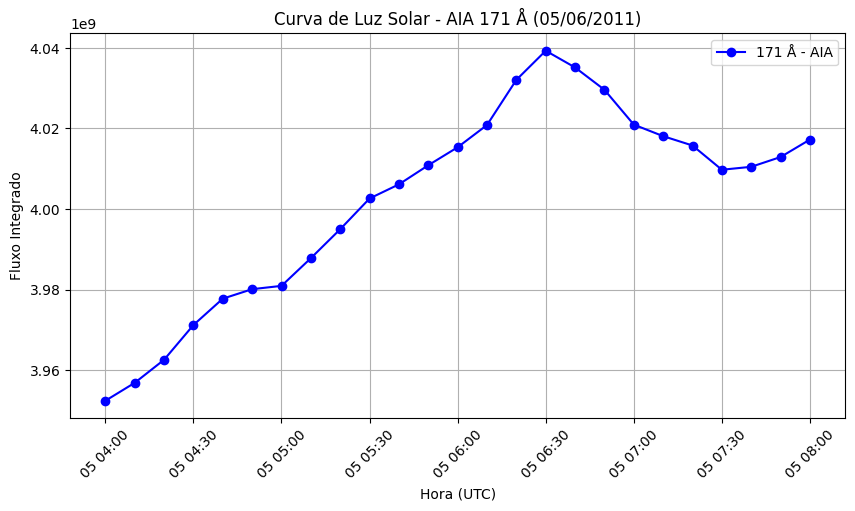

In [5]:
plt.figure(figsize=(10,5))
plt.plot(horarios, fluxo_total, marker='o', linestyle='-', color='b', label="171 Å - AIA")
plt.xlabel("Hora (UTC)")
plt.ylabel("Fluxo Integrado")
plt.title("Curva de Luz Solar - AIA 171 Å (05/06/2011)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()